# EDA
- Statistical Analysis
- Data Visualization

## Loading Dataset

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
# Importing the cleaned dataset
data = pd.read_csv(r"B:\Summer_Training_2024\Flight_Fare_Prediction\flight_data_cleaned.csv", 
                   low_memory = False)
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration_minutes,routes,duration_slab
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953.0,137.0,Delhi-Mumbai,2 to 5 hrs
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953.0,153.0,Delhi-Mumbai,2 to 5 hrs
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956.0,137.0,Delhi-Mumbai,2 to 5 hrs
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955.0,145.0,Delhi-Mumbai,2 to 5 hrs
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955.0,153.0,Delhi-Mumbai,2 to 5 hrs


In [152]:
# Creating a copy
df = data.copy()

## Statistical Analysis

In [153]:
df.describe(include = 'all')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration_minutes,routes,duration_slab
count,297808,297808,297808,297808,297808,297808,297808,297808,297808.000000,297808.000000,297808.000000,297808,297808
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN,30,5
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN,Delhi-Mumbai,5 to 12 hrs
freq,126893,3116,61145,70360,249374,90690,58644,204716,NaN,NaN,NaN,15289,116648
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.039737,20882.163276,741.590716,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.549020,22672.480332,419.345082,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1105.000000,60.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,4757.000000,427.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.000000,7424.000000,685.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.000000,42521.000000,977.000000,NaN,NaN


In [154]:
# columns
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'days_left', 'price',
       'duration_minutes', 'routes', 'duration_slab'],
      dtype='object')

## Data Visualization

### Questions to be answered:
- price vs class
- price vs route
- price vs departure_time
- price vs arrival_time
- price vs days_left
- price vs duration
- price vs stops
- price vs airline

#### price vs class

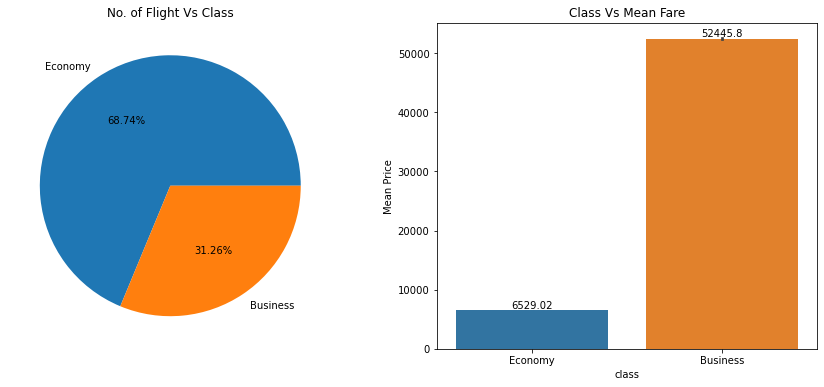

In [136]:
# class vs no. of flight
fig, ax = plt.subplots(1,2,figsize = (15,6))
ax[0].pie(x = df['class'].value_counts(), 
          labels = df['class'].value_counts().index, 
          autopct = "%1.2f%%")
ax[0].set_title('No. of Flight Vs Class')

    
    
# class vs avg price
sns.barplot(x = 'class', y = 'price', data = df, ax = ax[1])
ax[1].set_ylabel('Mean Price')
ax[1].set_title('Class Vs Mean Fare')

# Fetching the bar labels
for h in ax[1].containers:
    ax[1].bar_label(h)

plt.show()

#### Plot Function

### Price Trend on Days Left

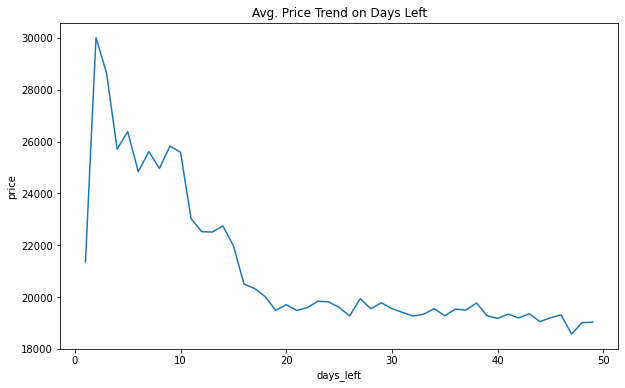

In [137]:
plot_data_days_left = df.groupby(['days_left'])['price'].mean().reset_index()
fig,ax = plt.subplots(figsize = (10,6))
sns.lineplot(x = 'days_left', y = 'price', data = plot_data_days_left, ax = ax)
ax.set_title("Avg. Price Trend on Days Left")
plt.show()

### Busiest Route & Price dependency on Routes

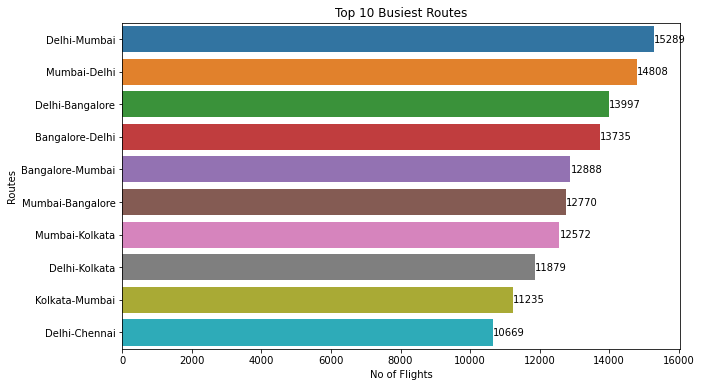

In [138]:
# Top 10 busiest routes
plot_data_routes_count = df['routes'].value_counts().sort_values(
                            ascending = False)[:10].reset_index()
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(y = 'index', x ='routes', data = plot_data_routes_count, ax = ax)
ax.set_title('Top 10 Busiest Routes')
ax.set_xlabel('No of Flights')
ax.set_ylabel('Routes')

# Fetching the bar labels
for i in ax.containers:
    ax.bar_label(i)


plt.show()

In [139]:
# Plot Data
plot_data_routes_price = df.groupby(['routes', 'class'])['price'].mean().unstack().reset_index()
plot_data_routes_price.head(2)

class,routes,Business,Economy
0,Bangalore-Chennai,52183.318873,7033.548571
1,Bangalore-Delhi,48127.546101,6108.466848


#### Price Vs Routes

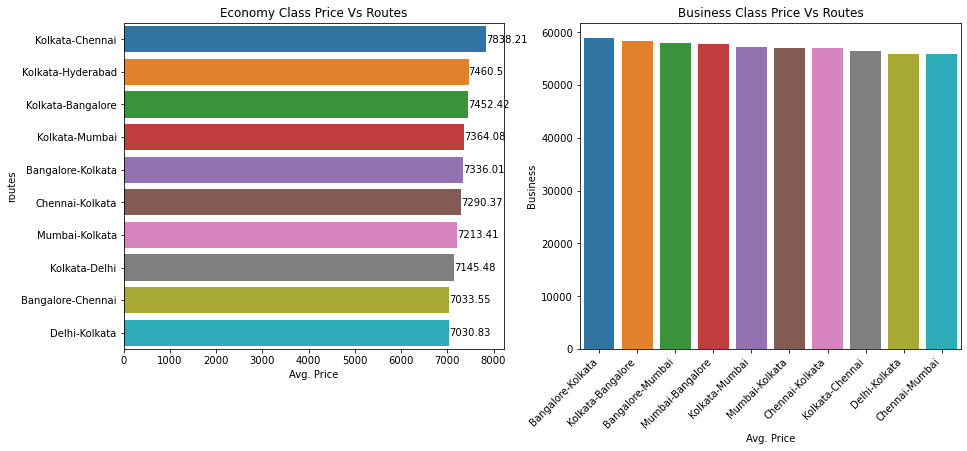

In [140]:
fig, ax = plt.subplots(1,2, figsize = (15,6))

# Economy Price Vs Routes Plot
sns.barplot(y = 'routes', x = 'Economy',
            data = plot_data_routes_price.sort_values(
                by = 'Economy', ascending = False)[:10], ax = ax[0])
ax[0].set_title('Economy Class Price Vs Routes')
ax[0].set_xlabel('Avg. Price')

# Fetching the bar labels
for i in ax[0].containers:
    ax[0].bar_label(i)
    

# Business Class Price Vs Routes Plot
sns.barplot(x = 'routes', y = 'Business',
            data = plot_data_routes_price.sort_values(
                by = 'Business', ascending = False)[:10], ax = ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")
ax[1].set_title('Business Class Price Vs Routes')
ax[1].set_xlabel('Avg. Price')




plt.show()

In [141]:
# Function to draw flight count plot
def count_plot(x_data):
    fig,ax = plt.subplots(figsize = (15,5))
    sns.countplot(x = x_data, hue = 'class', data = df, ax = ax)
    ax.set_title(f'{x_data} vs No. of flights')
    
    # Fetching the bar labels
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

In [142]:
# Function to plot avg fare
def avg_fare_plot(var_column):
    plot_data = df.groupby([var_column, 'class'])['price'].mean().sort_values(
                            ascending = False).reset_index()
    fig,ax = plt.subplots(figsize = (15,5))
    sns.barplot(x = var_column, y = 'price', hue = 'class', data = plot_data, ax = ax)
    ax.set_title(f'{var_column} vs avg. flight fare')
    
    # Getting the bar lavels
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()
    
    return plot_data

In [143]:
# Combined plot function
# This function will get the plot data and plot count plot and avg. price plot

def plot_function(var_column):
    
    count_plot(var_column)
    return avg_fare_plot(var_column)
    

### Price Vs Departure Time

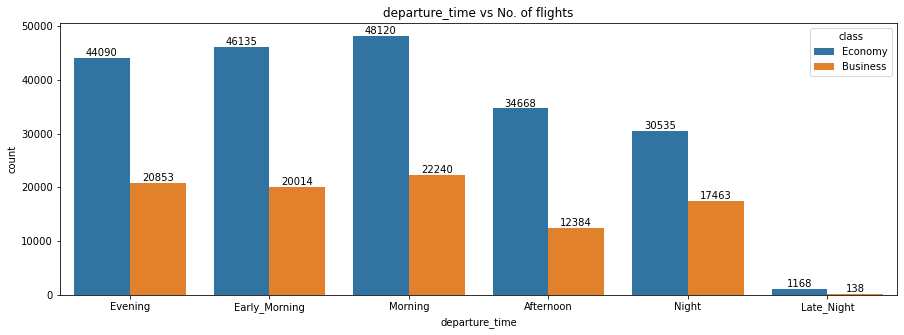

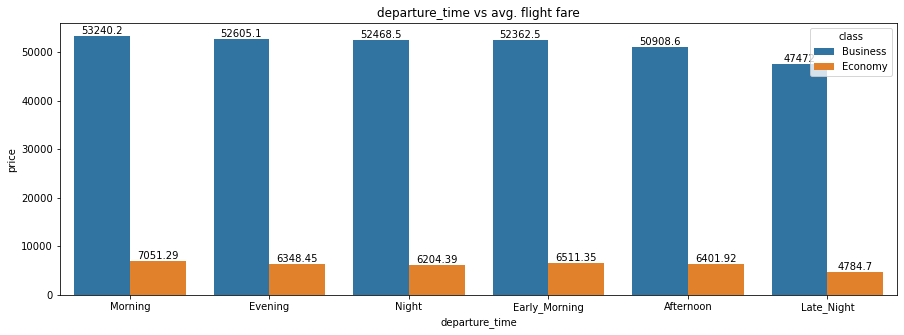

,departure_time,class,price
0,Morning,Business,53240.247797
1,Evening,Business,52605.070014
2,Night,Business,52468.522018
3,Early_Morning,Business,52362.535825
4,Afternoon,Business,50908.592297
5,Late_Night,Business,47471.971014
6,Morning,Economy,7051.292041
7,Early_Morning,Economy,6511.354763
8,Afternoon,Economy,6401.917907
9,Evening,Economy,6348.445702


In [144]:
plot_function('departure_time')

### Price Vs Arrival Time

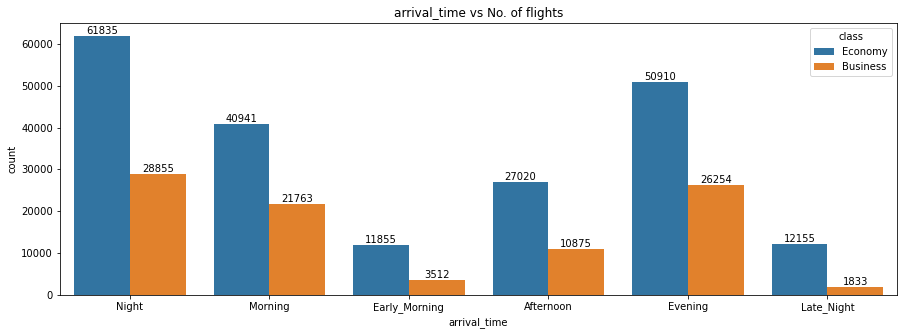

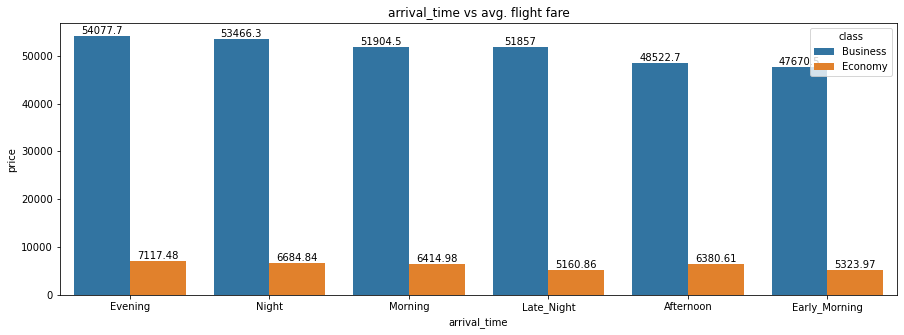

,arrival_time,class,price
0,Evening,Business,54077.736916
1,Night,Business,53466.284699
2,Morning,Business,51904.516059
3,Late_Night,Business,51856.984724
4,Afternoon,Business,48522.696828
5,Early_Morning,Business,47670.459282
6,Evening,Economy,7117.483520
7,Night,Economy,6684.842516
8,Morning,Economy,6414.980118
9,Afternoon,Economy,6380.605662


In [145]:
plot_function('arrival_time')

### Price vs Duration

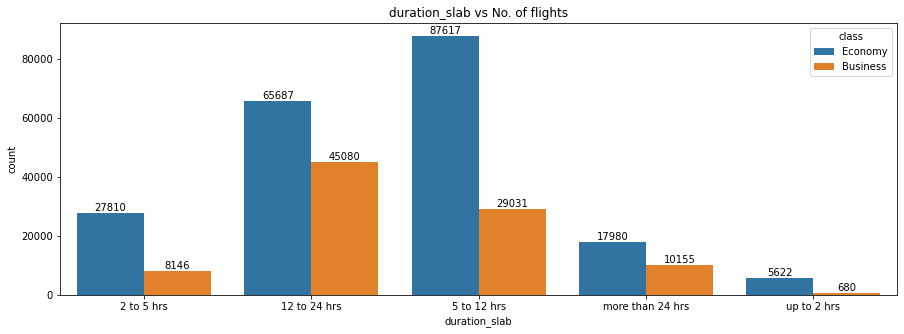

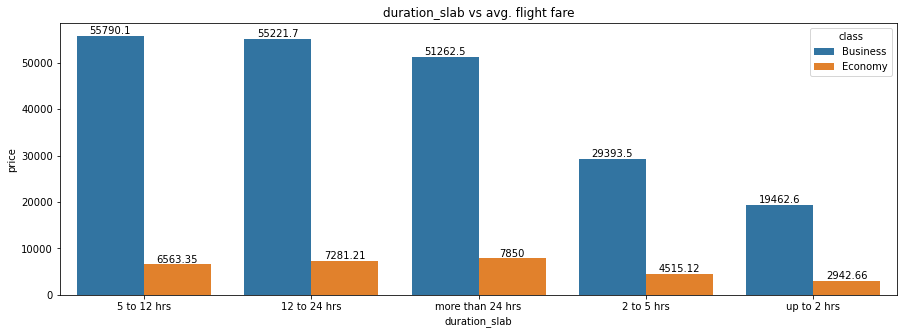

,duration_slab,class,price
0,5 to 12 hrs,Business,55790.066584
1,12 to 24 hrs,Business,55221.720209
2,more than 24 hrs,Business,51262.533136
3,2 to 5 hrs,Business,29393.471643
4,up to 2 hrs,Business,19462.577941
5,more than 24 hrs,Economy,7849.995495
6,12 to 24 hrs,Economy,7281.205109
7,5 to 12 hrs,Economy,6563.353778
8,2 to 5 hrs,Economy,4515.118770
9,up to 2 hrs,Economy,2942.663465


In [146]:
plot_function('duration_slab')

### Price Vs Stpos

In [147]:
df.head(2)

,airline,flight,source_city,departure_time,arrival_time,destination_city,class,days_left,price,duration_minutes,stops_count,routes,duration_slab
0,SpiceJet,SG-8709,Delhi,Evening,Night,Mumbai,Economy,1,5953.0,137.0,0,Delhi-Mumbai,2 to 5 hrs
1,SpiceJet,SG-8157,Delhi,Early_Morning,Morning,Mumbai,Economy,1,5953.0,153.0,0,Delhi-Mumbai,2 to 5 hrs


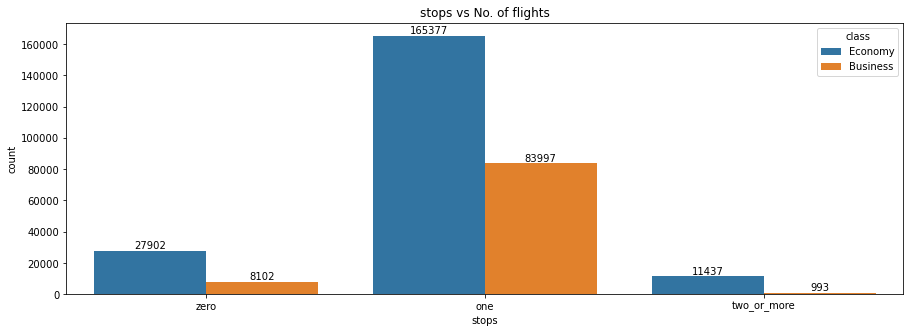

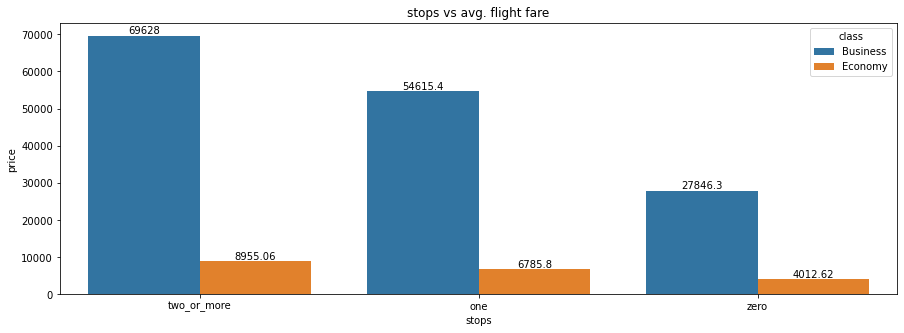

,stops,class,price
0,two_or_more,Business,69628.032226
1,one,Business,54615.399264
2,zero,Business,27846.339052
3,two_or_more,Economy,8955.055871
4,one,Economy,6785.796622
5,zero,Economy,4012.624615


In [155]:
plot_function('stops')

### Price Vs Airline

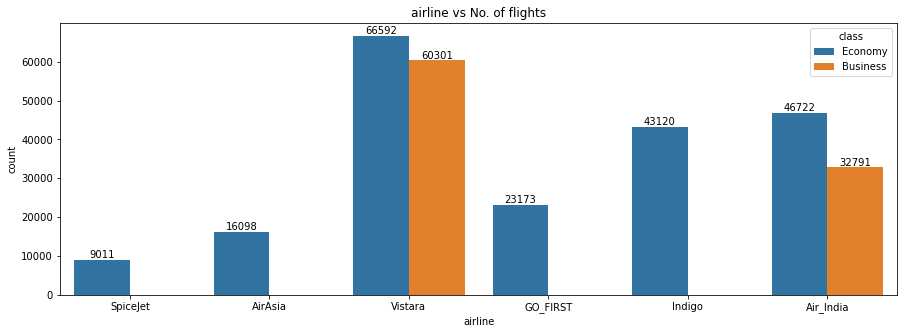

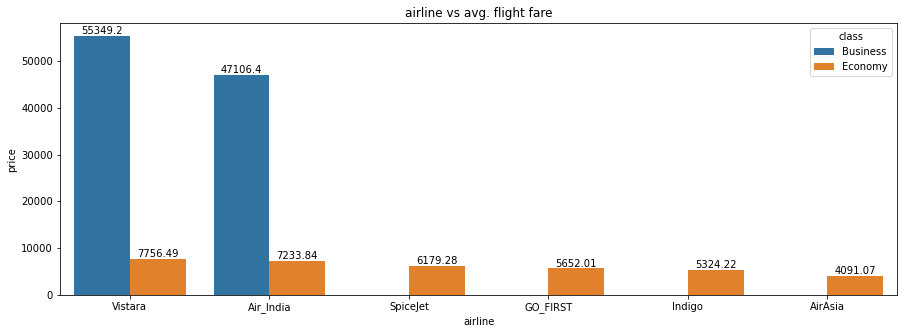

,airline,class,price
0,Vistara,Business,55349.249382
1,Air_India,Business,47106.409686
2,Vistara,Economy,7756.494173
3,Air_India,Economy,7233.844955
4,SpiceJet,Economy,6179.278881
5,GO_FIRST,Economy,5652.007595
6,Indigo,Economy,5324.216303
7,AirAsia,Economy,4091.072742


In [156]:
plot_function('airline')

## Conclusion
1. **Class**
    - Economy class comprises 68% of total flights whereas Business class comprises only 32%
    - Economy class avg price is 6529 and business class avg price is 52445
2. **Days left**
    - Earlier the booking is done lesser is the price
3. **Routes**
    - Busiest route operating highest number of flight is Delhi - Mumbai
    - Costliest flight: a) Economy Class: Kolkata-Chennai route & b) Business class: Bangalore-Kolkata route
4. **Departure Time**
    - Morning flights are most freqquent and costliest
    - Late night flights are least frquent as well as cheapest
5. **Arrival Time**
    - Flight arriving at night at destination are more frequest whereas Early morning arrival is rarest
    - Evening arrival flights are costliest and Early morning arriving flights are cheapest
6. **Duration**
    - Maximum Flights operates with avg. duration 5-12 hours, also they are costliest
    - Flights with avg. duration up to 2 hours are least frequent as well as cheapest
7. **Stops**
    - 1-stop flights are maximum in numbers and flights having 2 or more stops are minimum
    - Flights with 2 or more stops are costliest and Non-stop flights are cheapest
8. **Airline**
    - Vistara operates highest no. of flights and spicejet operates least no. of flights
    - Vistara flights are costliest and AirAsia flights are cheapest